In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
# Doc du lieu VCB 2009->2018
dataset_train = pd.read_csv('vcb_2009_2018.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Thuc hien scale du lieu gia ve khoang 0,1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Tao du lieu train, X = 60 time steps, Y =  1 time step
X_train = []
y_train = []
no_of_sample = len(training_set)

In [5]:
for i in range(60, no_of_sample):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
# Xay dung model LSTM
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [7]:
# Neu ton tai file model thi load
if path.exists("mymodel.h5"):
    regressor.load_weights("mymodel.h5")
else:
    # Con khong thi train
    regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)
    regressor.save("mymodel.h5")

In [8]:

# Load du lieu tu 1/1/2019 - 2/10/2019
dataset_test = pd.read_csv('vcb_2019.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


In [9]:
# Tien hanh du doan
dataset_total = pd.concat((dataset_train['CLOSE'], dataset_test['CLOSE']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
no_of_sample = len(inputs)

for i in range(60, no_of_sample):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


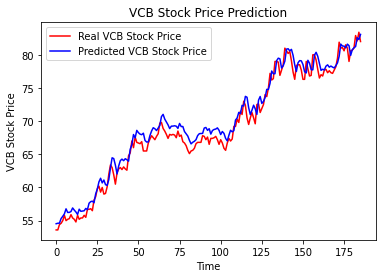

In [10]:
# Ve bieu do gia that va gia du doan
plt.plot(real_stock_price, color = 'red', label = 'Real VCB Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted VCB Stock Price')
plt.title('VCB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('VCB Stock Price')
plt.legend()
plt.show()
